In [2]:
# importing data handling libraries
import pandas as pd
import numpy as np
from collections import OrderedDict

# importing data transformation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# importing statistics libraries
import scipy.stats as scipy_stats

# importing model building algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

# importing model evaluation & validation algorithms
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# clustering
from sklearn.cluster import KMeans


# feature Selection Libraries
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Hyperparameter Tuning Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Importing data
df = pd.read_csv('Data.csv')
df_new = df.copy()

In [4]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [6]:
# A user defined function that will help to analyse statistics easily by adding skewness, kurtosis whether data feature has
# outlier or not and skewness in the data


def custom_summary(df2):

    result = []
    for col in df2.columns.to_list():
        # creating a dictionary for stastical summary features
        stats = OrderedDict({'Feature Name': col,
                             'Count': df2[col].count(),
                             'Data Type': df2[col].dtype,
                             'Minimum': df2[col].min(),
                             'Quartile1': df2[col].quantile(0.25),
                             'Mean': df2[col].mean(),
                             'Median': df2[col].median(),
                             'Quartile3': df2[col].quantile(0.75),
                             'Maximum': df2[col].max(),
                             'Skewness': df2[col].skew(),
                             'Kurtosis': df2[col].kurt()})

        # commenting on the skewness
        if df2[col].skew() < -1:
            sklable = 'Highly Negatively Skewed'
        elif -1 <= df2[col].skew() < -0.5:
            sklabel = 'Moderately Negative Skewed'
        elif -0.5 < df2[col].skew() < 0:
            sklabel = 'Fairly Symmetric(Negative)'
        elif 0 < df2[col].skew() < 0.5:
            sklabel = 'Fairly Symmetric(Positive)'
        elif 0.5 < df2[col].skew() < 1:
            sklabel = 'Moderately Positive skewed'
        else:
            sklabel = 'Highly Positive Skewed'

        stats['skewness comment'] = sklabel

        # Detecting outliers
        IQR = stats['Quartile3']-stats['Quartile1']
        lowerlimit = stats['Quartile1']-(1.5*IQR)
        upperlimit = stats['Quartile3']+(1.5*IQR)

        if len([x for x in df2[col] if x < lowerlimit or x > upperlimit]) > 0:
            outlabel = 'Has Outliers'
        else:
            outlabel = 'No Outlier'

        stats['Outliers Comment'] = outlabel

        result.append(stats)

    resultdf = pd.DataFrame(data=result)
    return resultdf

In [7]:
custom_summary(df)

Feature Name  Count Data Type  Minimum  Quartile1        Mean   Median  \
0        cement   1030   float64   102.00    192.375  281.167864  272.900   
1          slag   1030   float64     0.00      0.000   73.895825   22.000   
2           ash   1030   float64     0.00      0.000   54.188350    0.000   
3         water   1030   float64   121.80    164.900  181.567282  185.000   
4  superplastic   1030   float64     0.00      0.000    6.204660    6.400   
5     coarseagg   1030   float64   801.00    932.000  972.918932  968.000   
6       fineagg   1030   float64   594.00    730.950  773.580485  779.500   
7           age   1030     int64     1.00      7.000   45.662136   28.000   
8      strength   1030   float64     2.33     23.710   35.817961   34.445   

   Quartile3  Maximum  Skewness   Kurtosis            skewness comment  \
0    350.000    540.0  0.509481  -0.520652  Moderately Positive skewed   
1    142.950    359.4  0.800717  -0.508175  Moderately Positive skewed   
2    118.300    200.1  0.537354  -1.328746  Moderately Positive skewed   
3    192.000    247.0  0.074628   0.122082  Fairly Symmetric(Positive)   
4     10.200     32.2  0.907203   1.411269  Moderately Positive skewed   
5   1029.400   1145.0 -0.040220  -0.599016  Fairly Symmetric(Negative)   
6    824.000    992.6 -0.253010  -0.102177  Fairly Symmetric(Negative)   
7     56.000    365.0  3.269177  12.168989      Highly Positive Skewed   
8     46.135     82.6  0.416977  -0.313725  Fairly Symmetric(Positive)   

  Outliers Comment  
0       No Outlier  
1     Has Outliers  
2       No Outlier  
3     Has Outliers  
4     Has Outliers  
5       No Outlier  
6     Has Outliers  
7     Has Outliers  
8     Has Outliers

### Visualization for outlier detection

In [8]:
# A user defined function to detect outliers by visualization


def outlier_detection_plots(df, col):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    ax1.set_title(col+' Box Plot')
    ax1.set_xlabel('box density')
    ax1.set_ylabel(col+' Values')

    sns.boxplot(df[col], ax=ax1, orient='v', color='r')

    # Plotting histogram with outliers
    sns.distplot(df[col], ax=ax2, fit=scipy_stats.norm)
    ax2.set_title(col+' Histogram with Outliers')
    ax2.set_xlabel('density')
    ax2.set_ylabel(col+'. Values')
    ax2.axvline(df[col].mean(), color='g', linestyle='--')
    ax2.axvline(df[col].median(), color='black', linestyle='-')

    # Plotting histogram without outliers
    upper_bound, lower_bound = np.percentile(df[col], [5, 95])
    y = pd.DataFrame(np.clip(df[col], upper_bound, lower_bound))

    sns.distplot(y[col], ax=ax3, fit=scipy_stats.norm)
    ax3.set_title(col+' Histogram without Outliers')
    ax3.set_xlabel('density')
    ax3.set_ylabel(col+' Values')
    ax3.axvline(y[col].mean(), color='g', linestyle='--')
    ax3.axvline(y[col].median(), color='black', linestyle='-')

    plt.show()

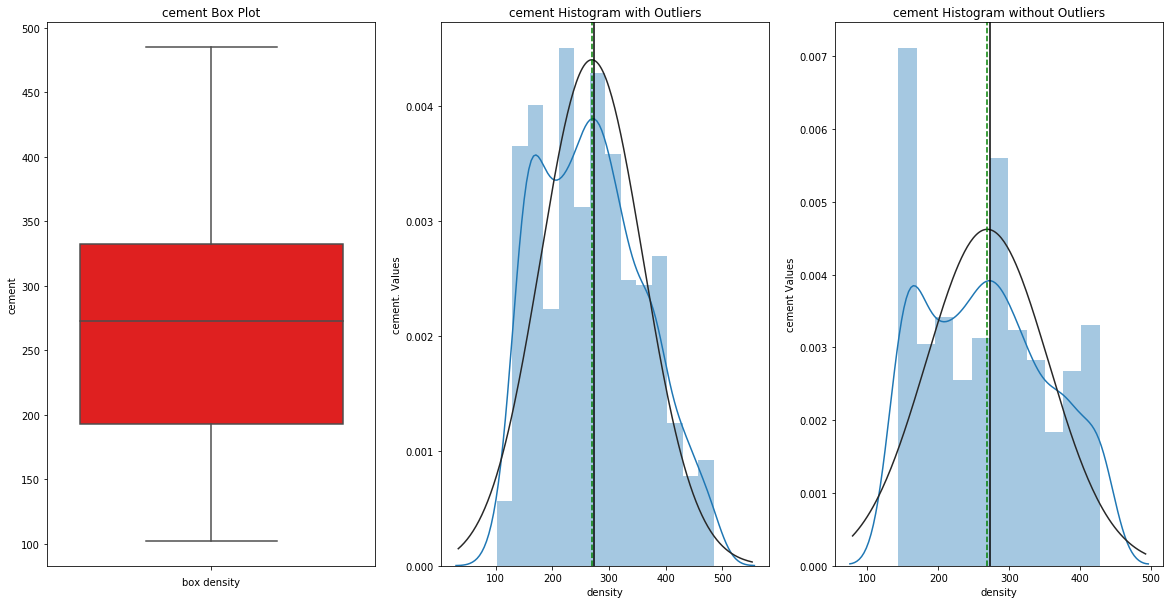

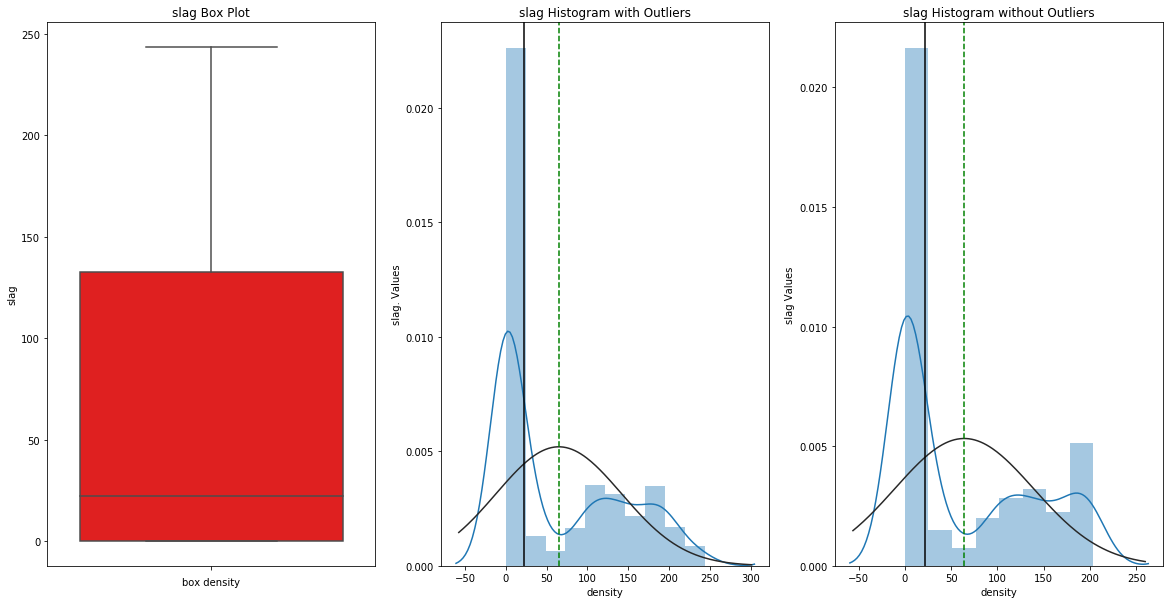

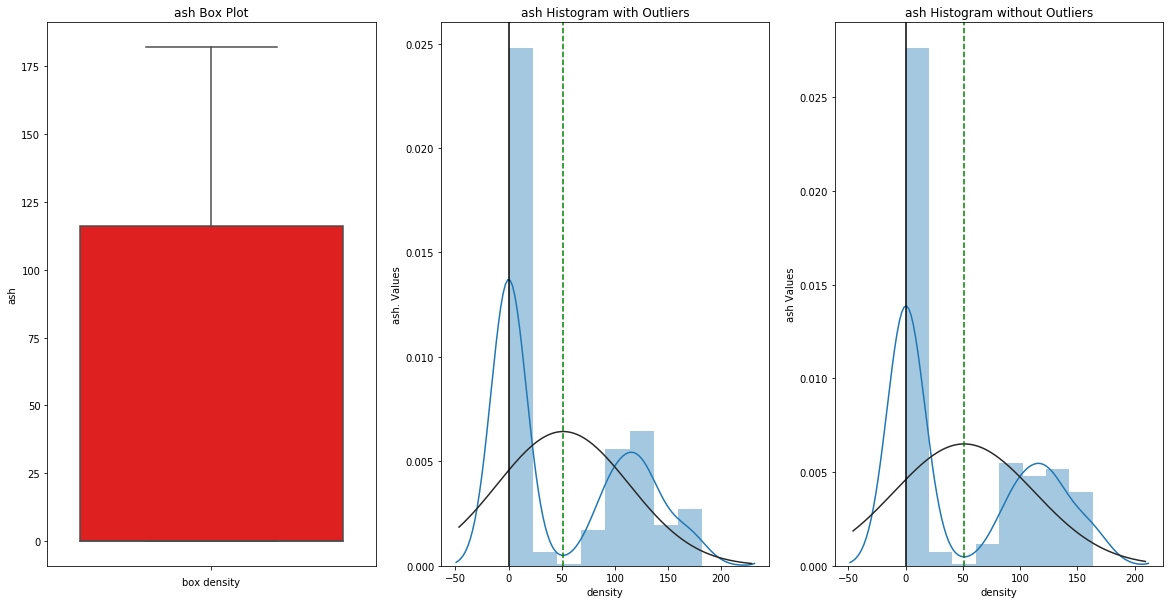

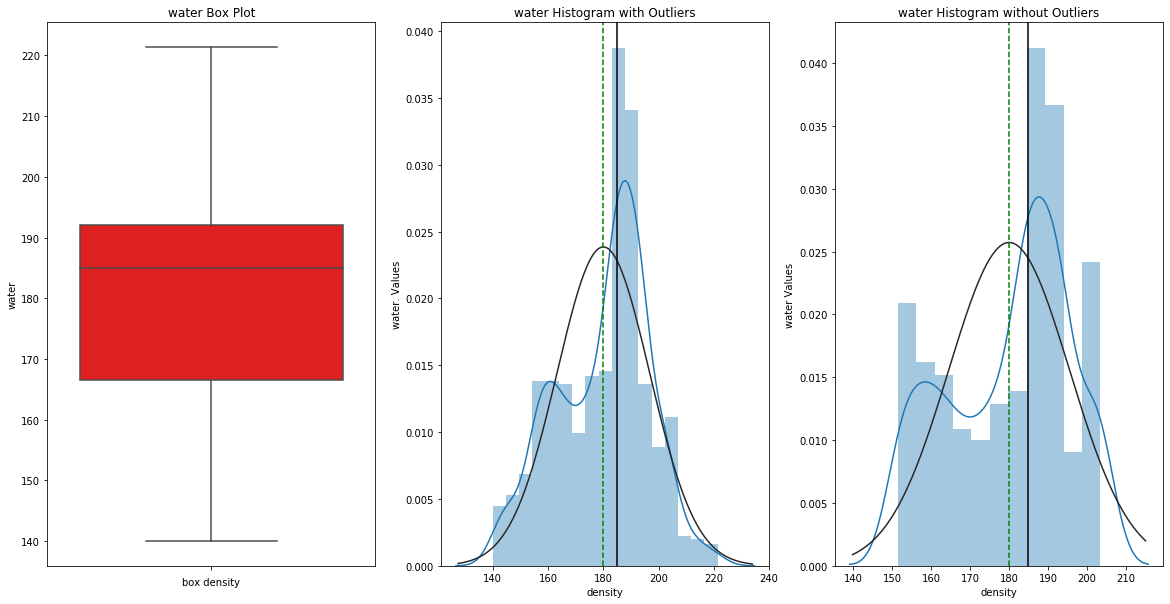

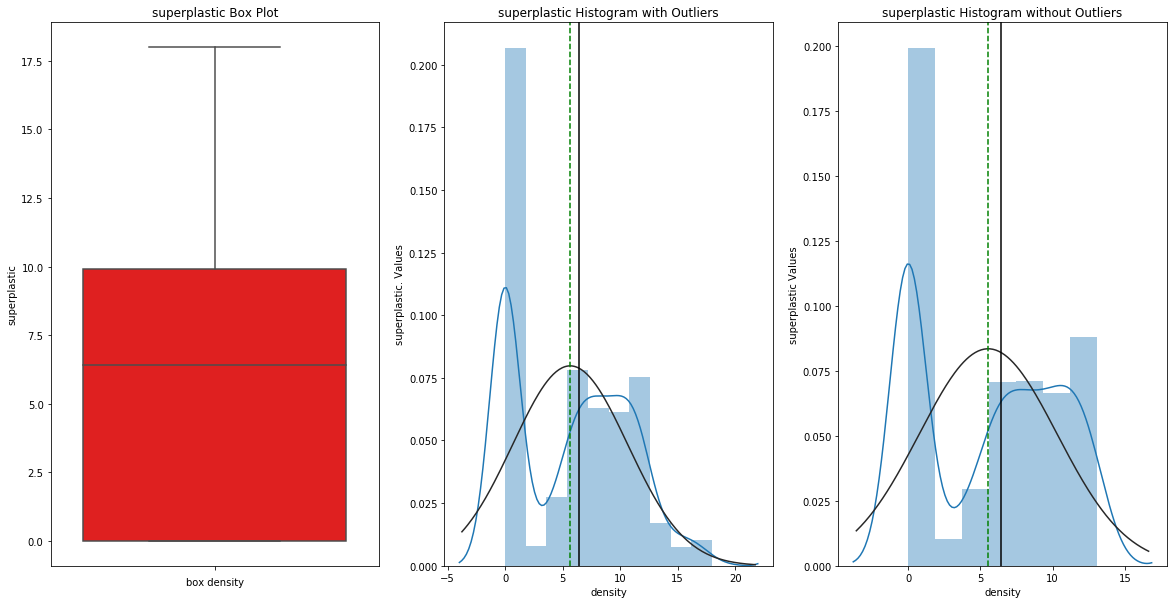

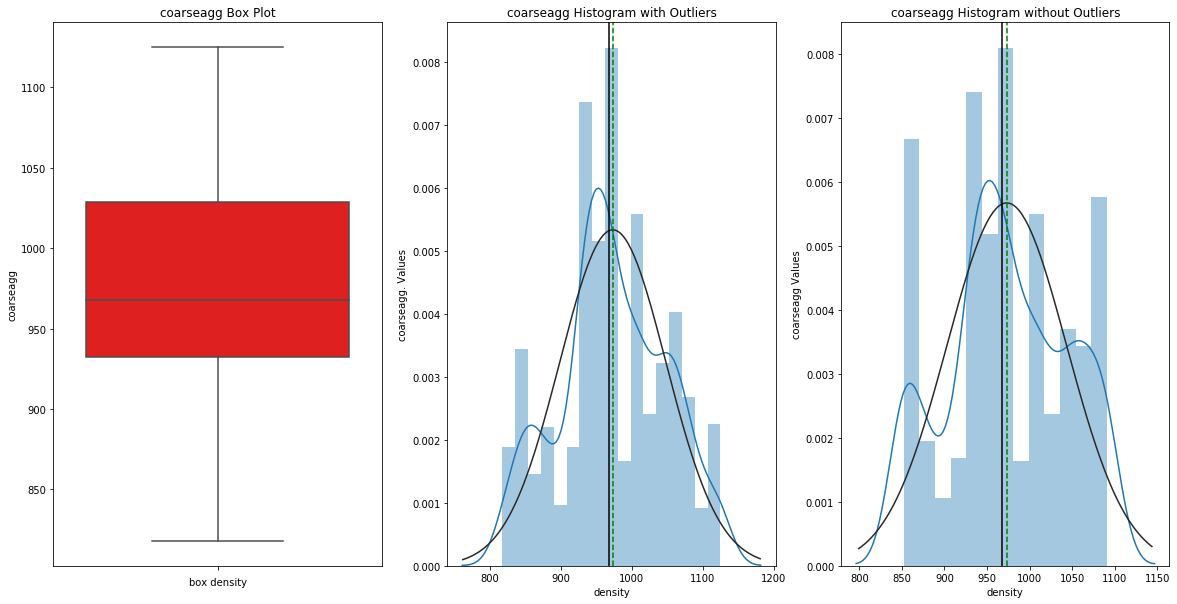

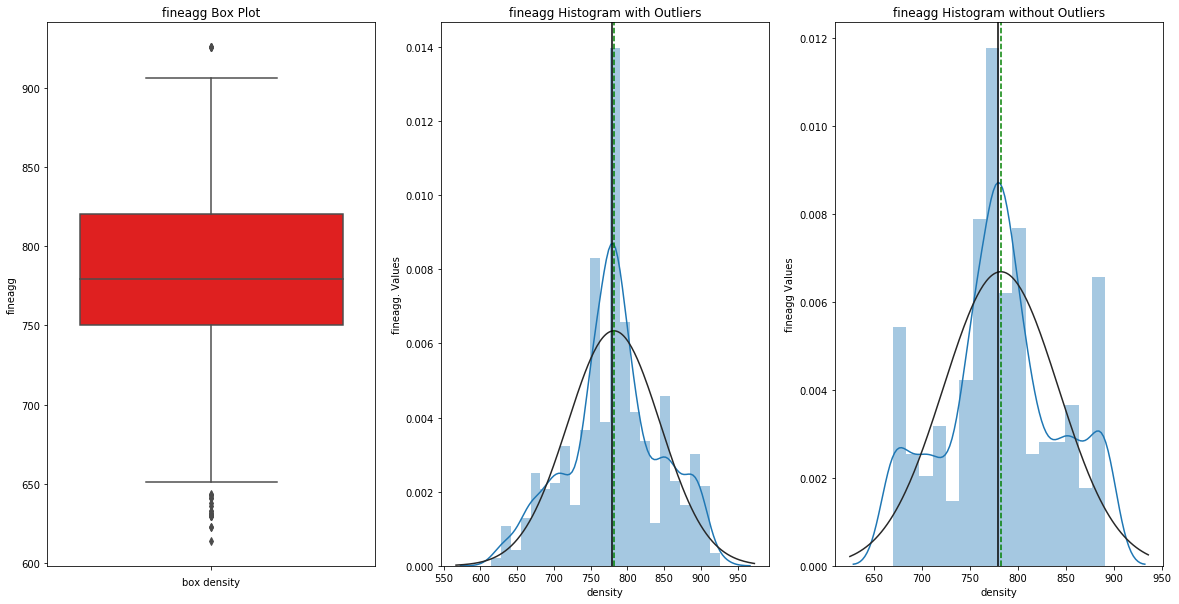

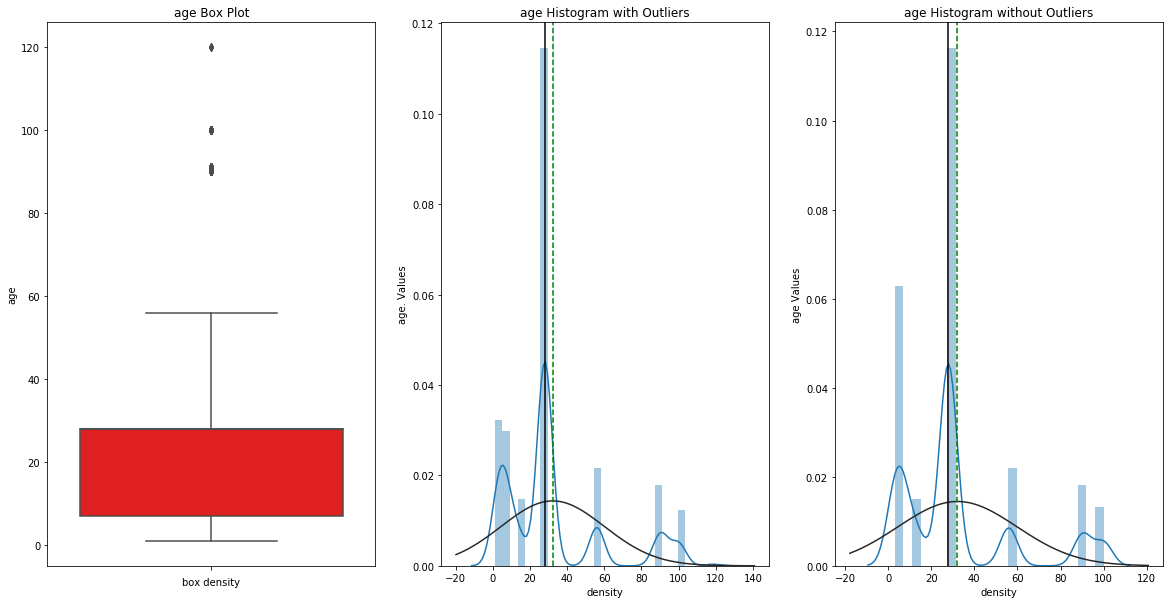

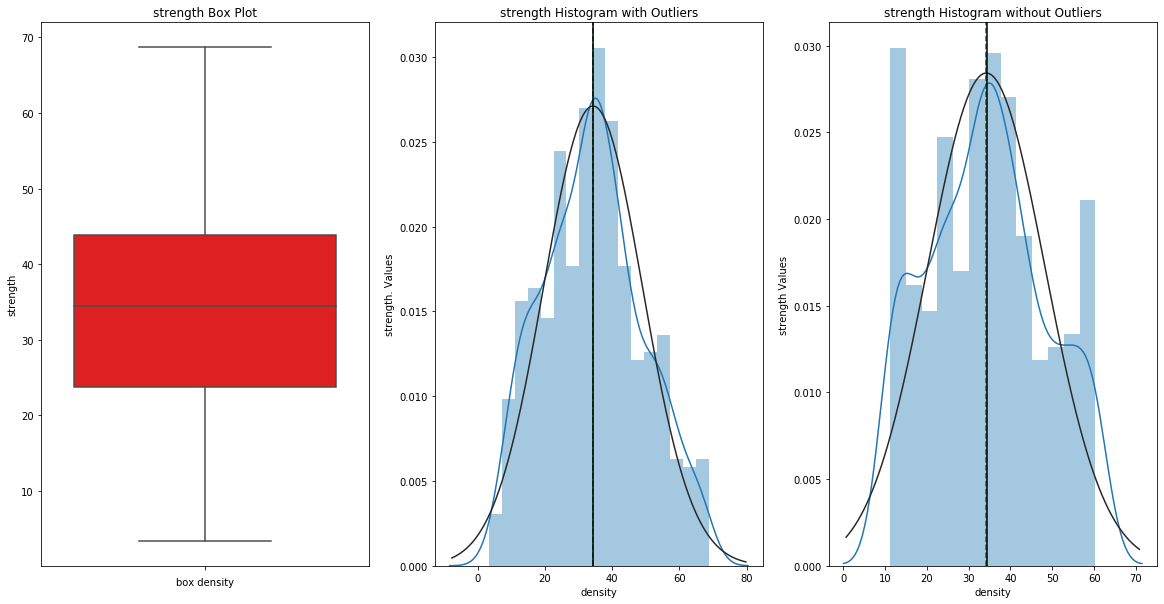

In [77]:
for col in list(df.columns):
    outlier_detection_plots(df,col)
    

### Identification of outliers & Treatment

In [10]:
# Detecting outliers from the data and treating them


def outlierTreat(col, strategy='Median'):
    col_mean, col_std, col_median = df[col].mean(
    ), df[col].std(), df[col].median()

    cutoff = col_std*2
    lowerlimit, upperlimit = col_mean-cutoff, col_mean+cutoff
    print(f'Outliers for {col} are  :', np.sort(
        [x for x in df[col] if x < lowerlimit or x > upperlimit]), '\n')

    strategy = 'Median'
    if strategy == 'Median':
        df.loc[(df[col] < lowerlimit) | (
            df[col] > upperlimit), col] = col_median
    else:
        df.loc[(df[col] < lowerlimit) | (df[col] > upperlimit), col] = col_mean

In [11]:
for col in list(df.columns):
    outlierTreat(col)

Outliers for cement are  : [491.  491.  491.  491.  491.  491.  491.  491.  500.  500.  500.  500.
 500.  500.  500.  500.  500.  500.  500.1 505.  516.  516.  520.  520.
 522.  522.  525.  525.  525.  525.  525.  525.  525.  528.  531.3 531.3
 531.3 531.3 531.3 540.  540.  540.  540.  540.  540.  540.  540.  540. ] 

Outliers for slag are  : [250.  250.  250.2 250.2 250.2 250.2 259.7 260.  262.2 262.2 262.2 262.2
 262.2 272.8 272.8 282.8 282.8 282.8 282.8 288.  288.  288.  288.  290.2
 290.2 305.3 305.3 305.3 305.3 316.1 316.1 342.1 342.1 359.4 359.4] 

Outliers for ash are  : [183.9 184.  185.  185.  185.3 187.  190.  193.  194.  194.9 195.  195.
 195.  200.  200.1] 

Outliers for water are  : [121.8 121.8 121.8 121.8 121.8 126.6 126.6 126.6 126.6 126.6 127.  127.3
 137.8 137.8 137.8 137.8 137.8 228.  228.  228.  228.  228.  228.  228.
 228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.
 228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.
 228. 

### Visualizing data with outliers

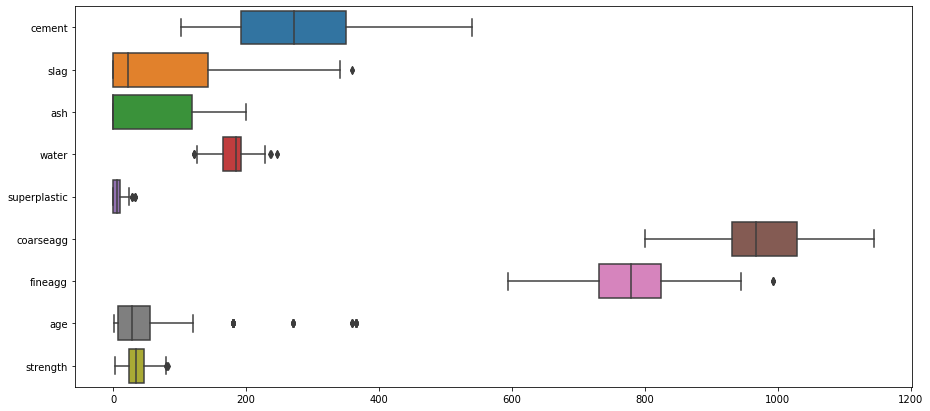

In [12]:
fig=plt.figure(figsize=(15,7))
ax=sns.boxplot(data=df_new,orient='h')

### Visualizing data without outliers


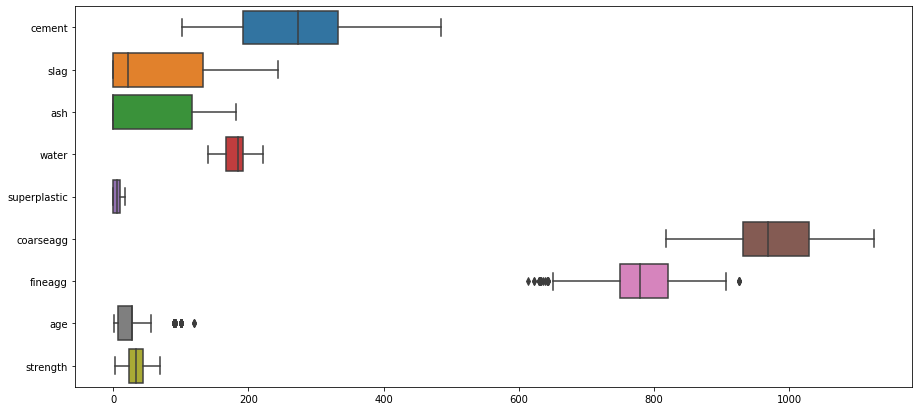

In [13]:
fig=plt.figure(figsize=(15,7))
ax=sns.boxplot(data=df,orient='h')

### Missing value Treatment

In [14]:
# checking number of missing values in the dataset
df.isnull().sum()

# no missing value in the features

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Exploring relationship between variables


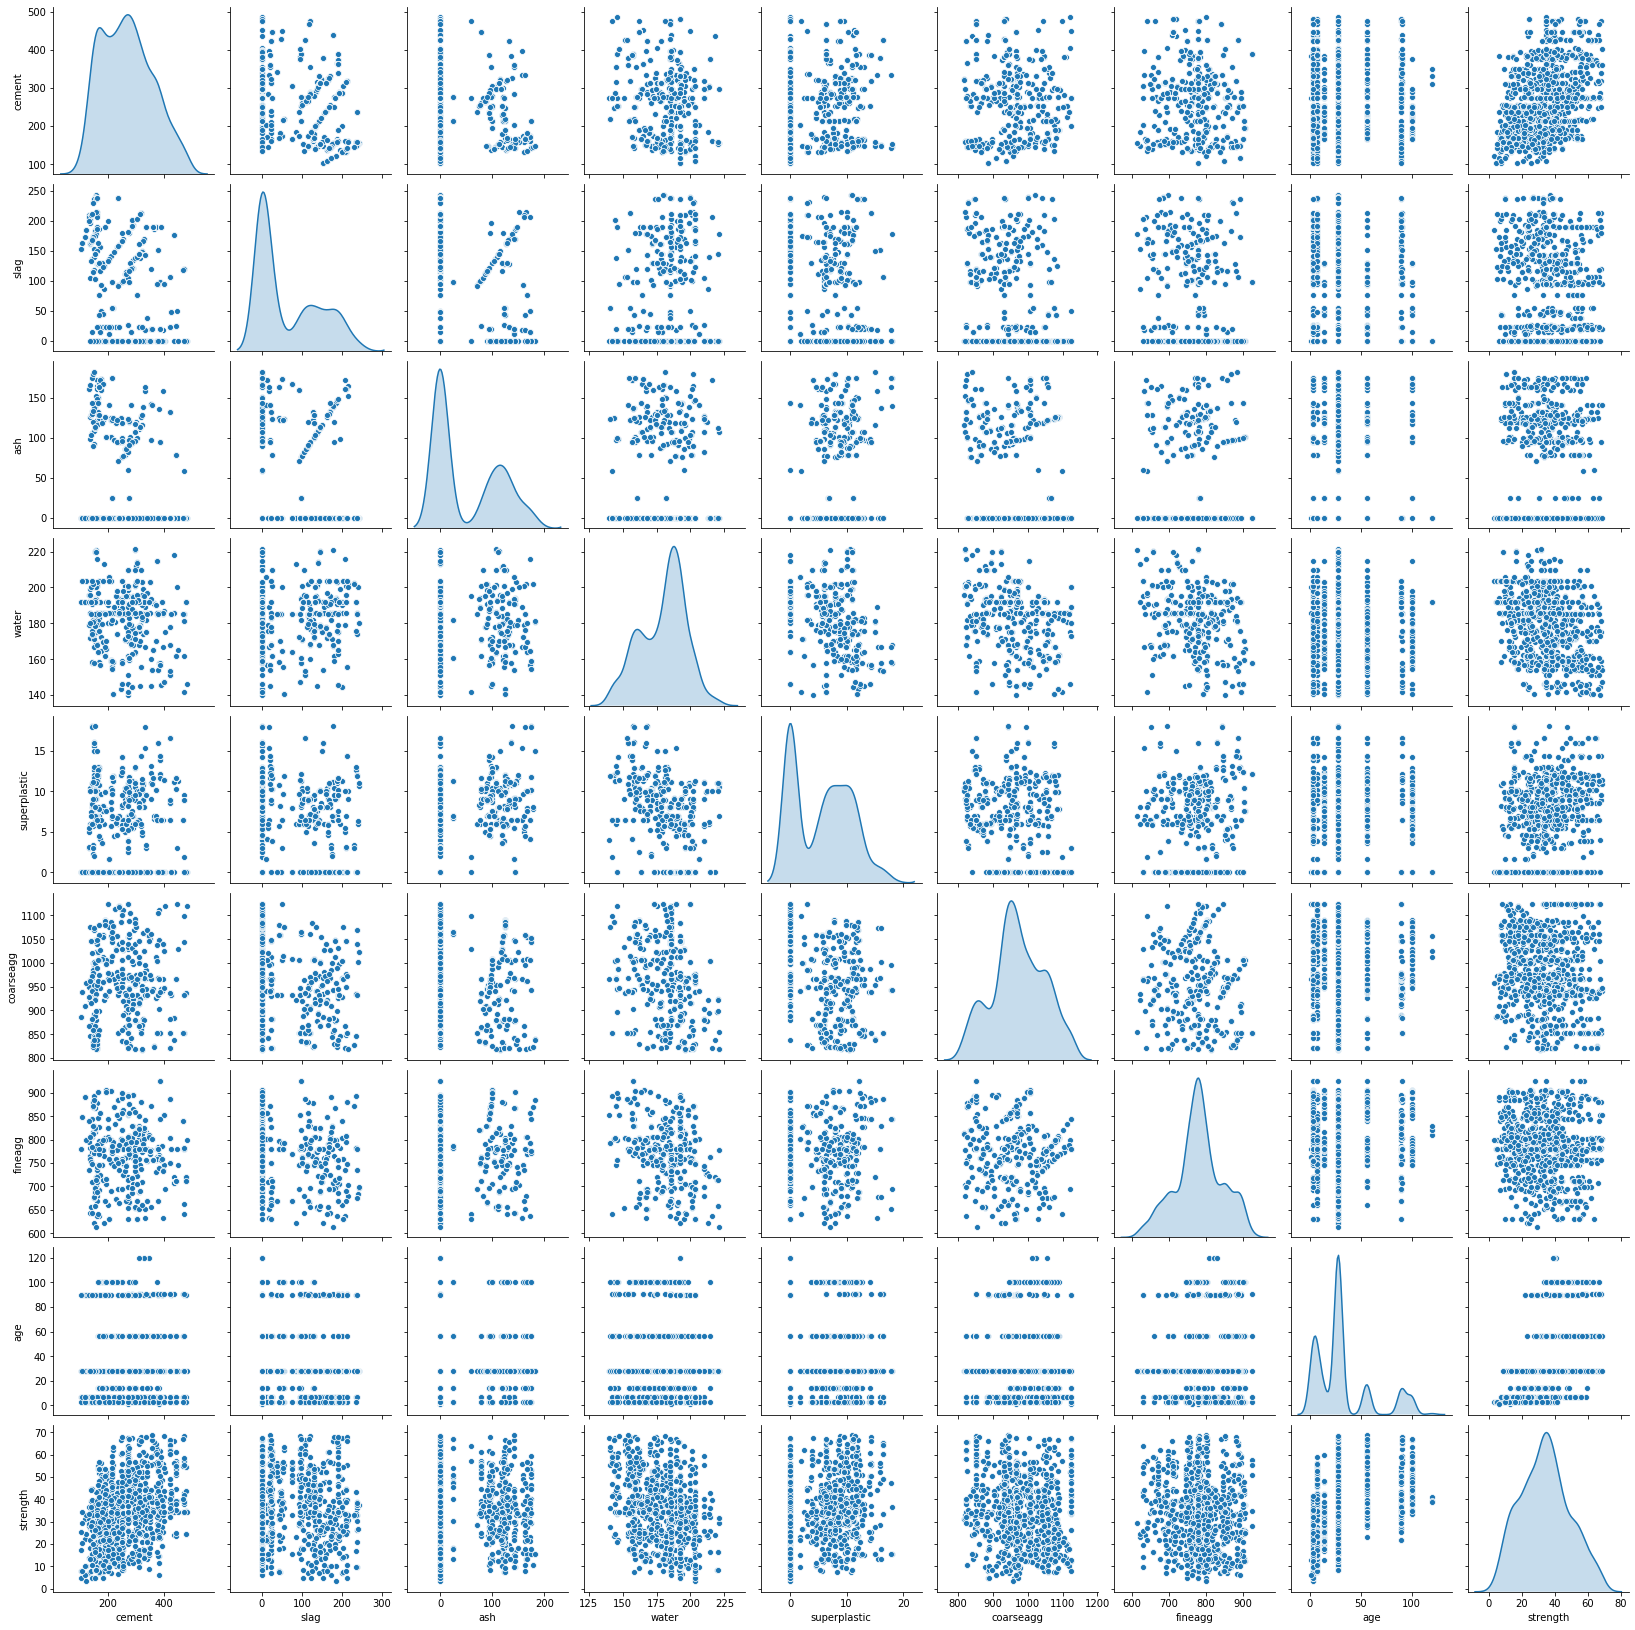

In [15]:
sns.pairplot(df,diag_kind='kde') #Kde=kernel density plots


### Multivariate Analysis

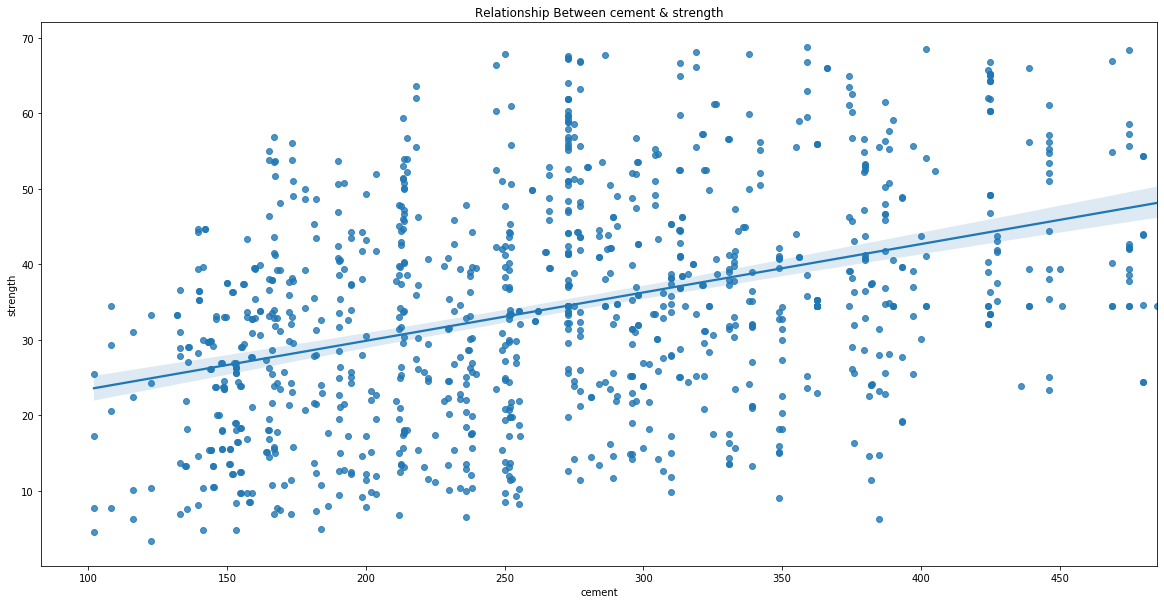

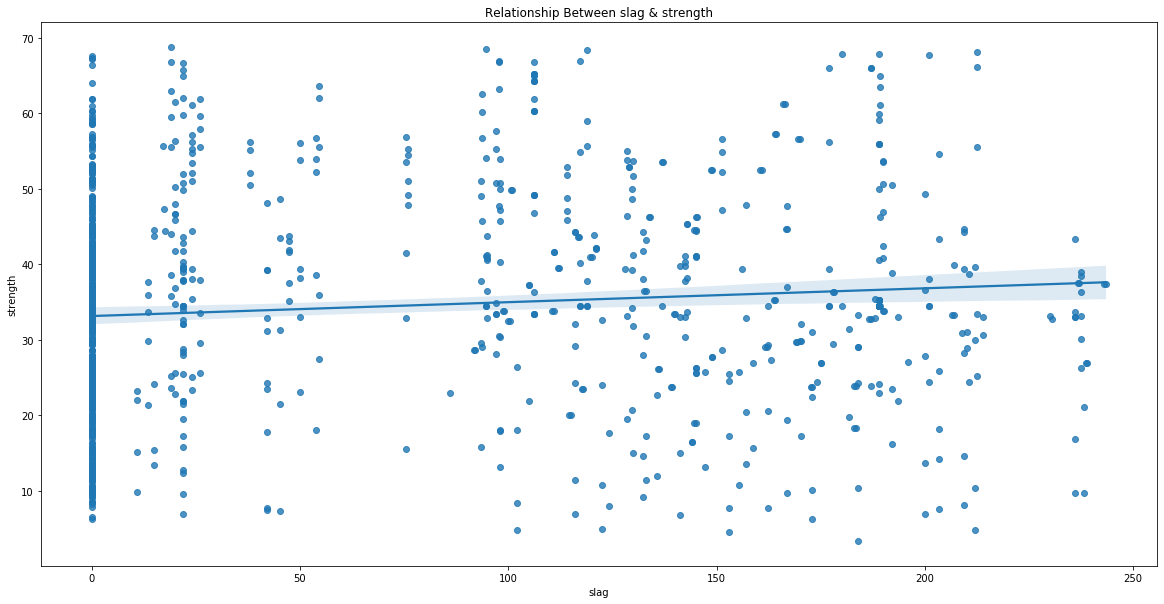

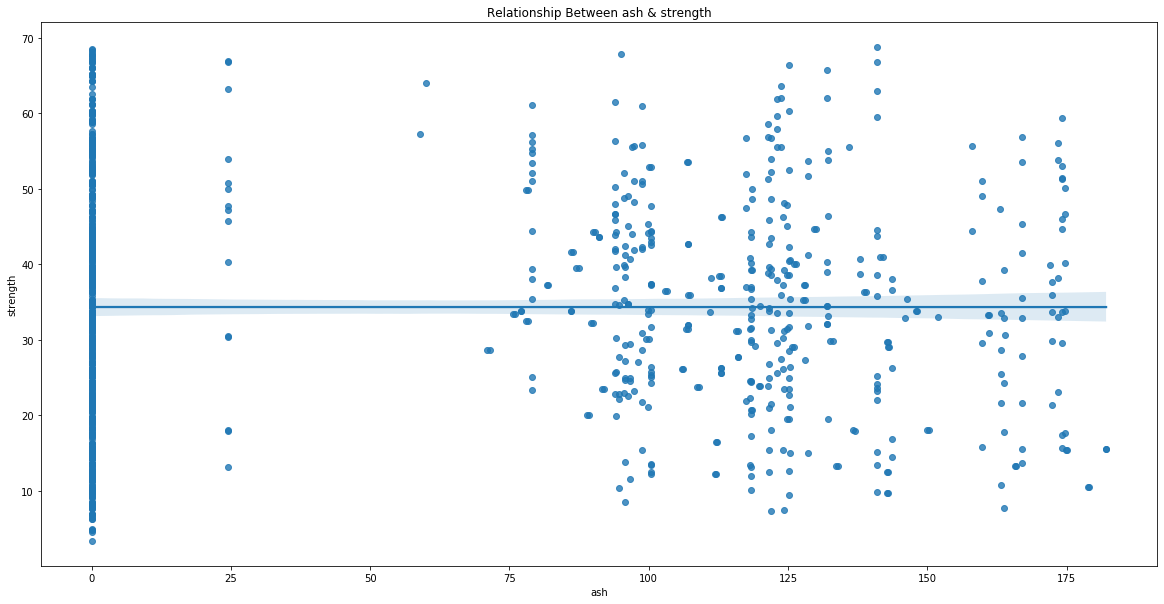

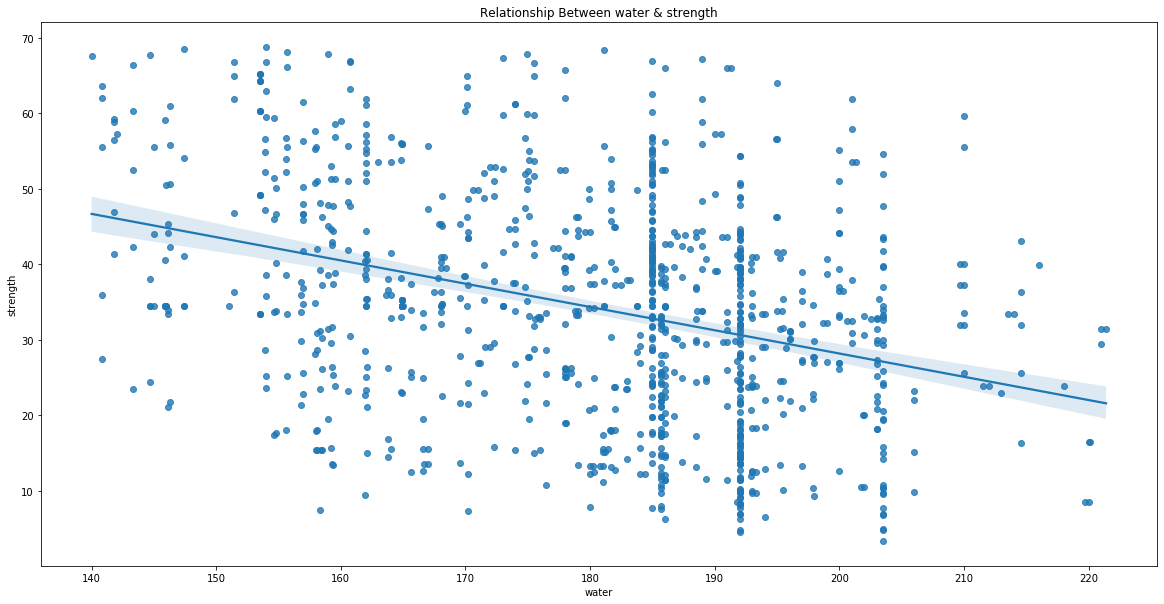

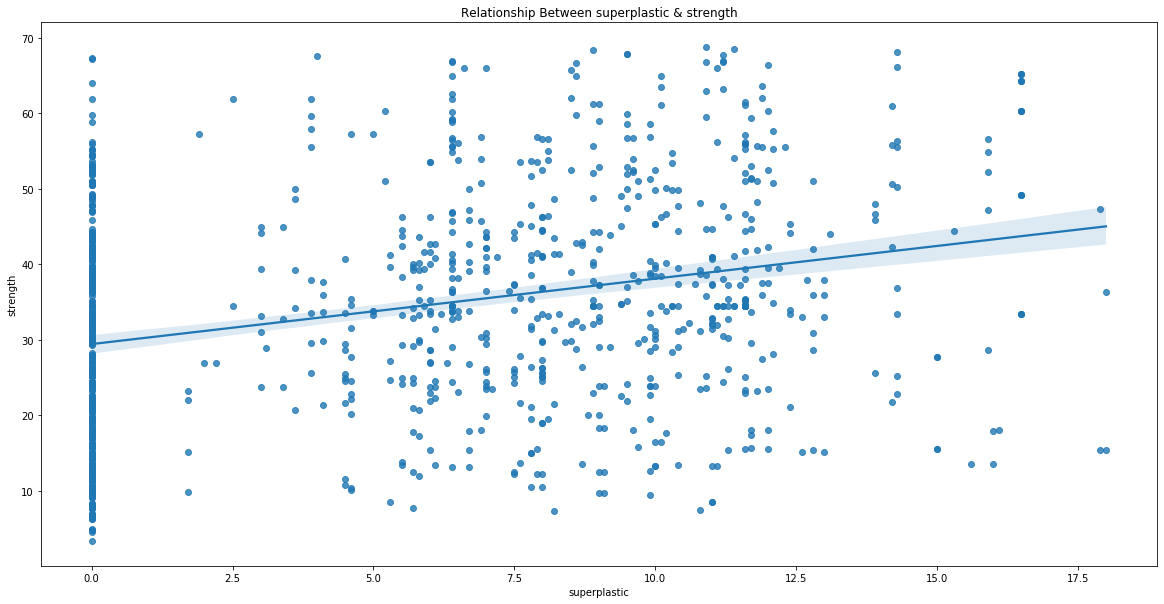

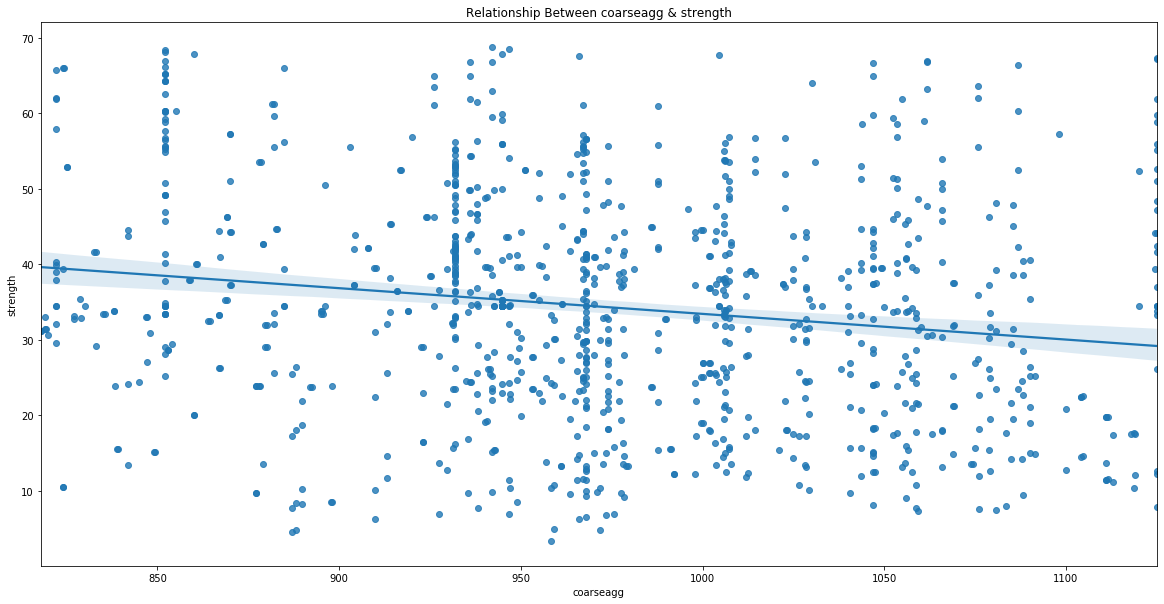

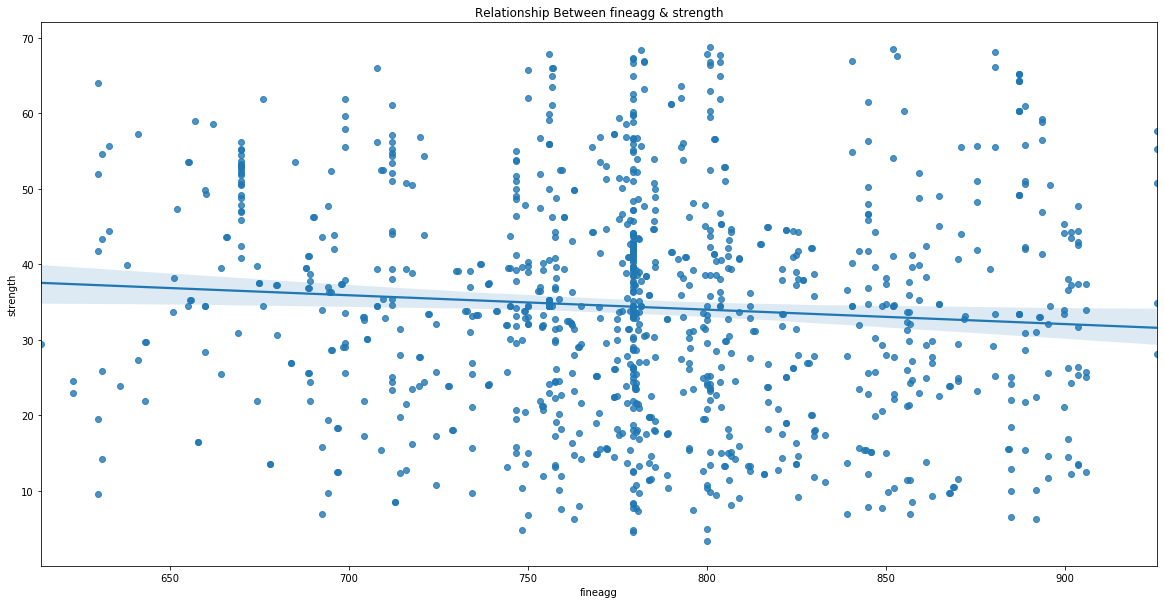

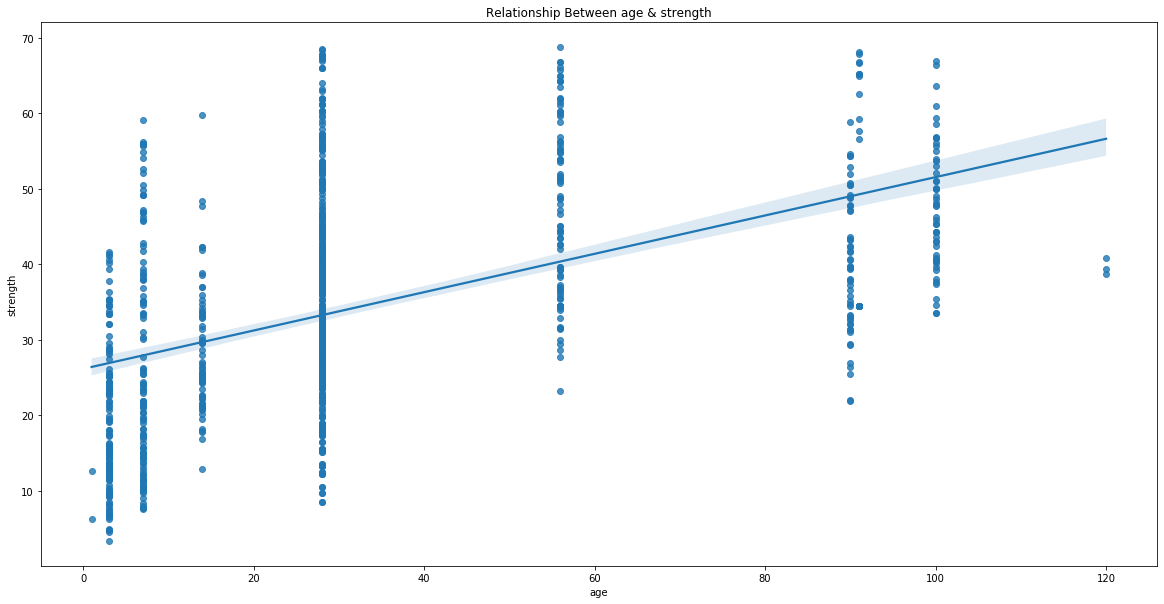

In [16]:
# checking for homoscedasticity in features

for col in list(df):
    if col!='strength':
        fig,ax1=plt.subplots(figsize=(20,10))
        sns.regplot(x=df[col],y=df['strength'],ax=ax1).set_title(f'Relationship Between {col} & strength')
        
# After looking at plots it can be seen that mostly data is homoscedasticity (constant variance)


### Multicolinearity Test using correlation matrix

> Using heatmap

In [17]:
corr_matrix=df.corr()

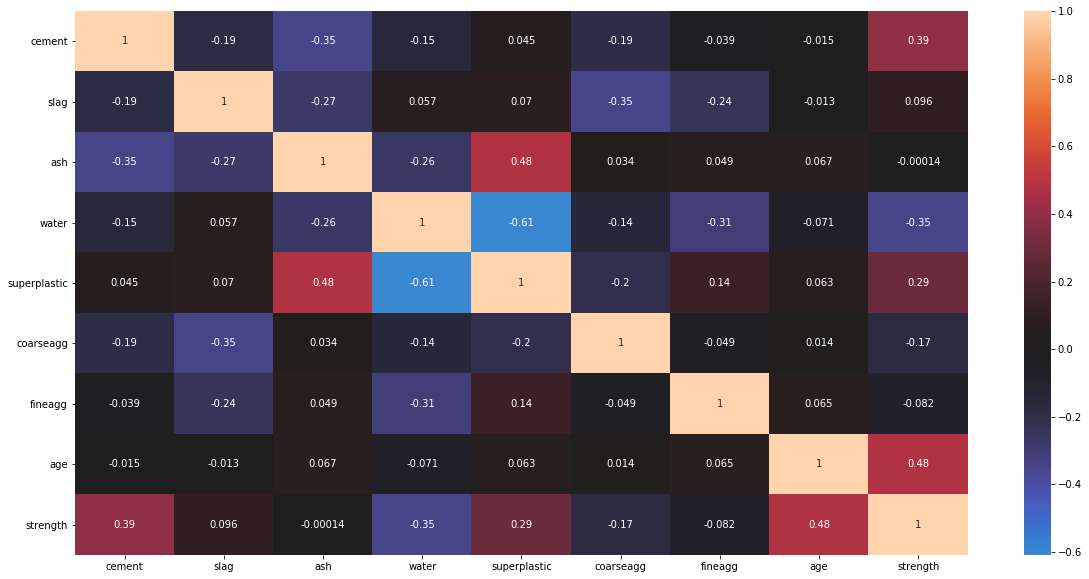

In [18]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,center=0,annot=True)

### Multicollinearity detection using VIF (variance inflation Factor)

> using Variance inflation factor

In [19]:
#VIX works as follows
#1.it will regress every independent variable with each other independent variable and calculate rsquare
#2.VIX of a particular variable is calculated as VIX=1/(1-r^2)
#3. Interpretation - a variable with VIX value > 5 is considered as highly collinear and hence neads treatments


In [20]:
x=df.iloc[:,:-1]

def vif_multicol(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    return vif.sort_values(by='VIF Factor',ascending=False).round(1)

In [21]:
vif_multicol(x)

VIF Factor      Features
6       109.2       fineagg
5       108.2     coarseagg
3        97.0         water
0        12.8        cement
4         4.8  superplastic
2         3.4           ash
1         2.4          slag
7         2.4           age

### Applying PCA for treating multicollinearity

In [22]:
x=StandardScaler().fit_transform(x)
pca=PCA()
p_comp=pca.fit_transform(x)
p_comp=pd.DataFrame(p_comp)
p_comp.head()

0         1         2         3         4         5         6  \
0 -2.296594  0.433178  1.773723  0.413194 -0.598378 -0.855379  0.044702   
1  2.003374 -1.096119  0.935192 -0.945688  0.076164 -1.000818  0.100898   
2  0.612353 -0.683839 -0.126979  0.085047 -1.178107  0.893385  0.103874   
3 -1.905788  0.601556  0.410337 -0.222691  0.892294 -0.110215 -0.691048   
4 -1.087097  0.351744  1.776861 -0.203065  0.778867 -1.398280  1.244397   

          7  
0 -0.236221  
1  0.011127  
2 -0.268654  
3  0.672866  
4  0.018874

In [23]:
vif_multicol(p_comp)

VIF Factor  Features
2         1.0         2
3         1.0         3
0         1.0         0
4         1.0         4
5         1.0         5
1         1.0         1
6         1.0         6
7         1.0         7

In [24]:
pca.explained_variance_ratio_

array([0.25683332, 0.18275041, 0.16341323, 0.12418022, 0.11450086,
       0.10471377, 0.03047457, 0.02313362])

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25683332, 0.43958374, 0.60299697, 0.72717719, 0.84167805,
       0.94639181, 0.97686638, 1.        ])

In [26]:
pca_df=p_comp.iloc[:,:-2]
pca_df.head()

0         1         2         3         4         5
0 -2.296594  0.433178  1.773723  0.413194 -0.598378 -0.855379
1  2.003374 -1.096119  0.935192 -0.945688  0.076164 -1.000818
2  0.612353 -0.683839 -0.126979  0.085047 -1.178107  0.893385
3 -1.905788  0.601556  0.410337 -0.222691  0.892294 -0.110215
4 -1.087097  0.351744  1.776861 -0.203065  0.778867 -1.398280

In [27]:
pca_df=pca_df.join(df[['strength']])
pca_df.head()

0         1         2         3         4         5  strength
0 -2.296594  0.433178  1.773723  0.413194 -0.598378 -0.855379     29.89
1  2.003374 -1.096119  0.935192 -0.945688  0.076164 -1.000818     23.51
2  0.612353 -0.683839 -0.126979  0.085047 -1.178107  0.893385     29.22
3 -1.905788  0.601556  0.410337 -0.222691  0.892294 -0.110215     45.85
4 -1.087097  0.351744  1.776861 -0.203065  0.778867 -1.398280     18.29

### Building Regression Model 

> User defined function to build and train Multiple models at once

In [28]:
def traintestsplit(df,target,test_size=0.3):
    x=df.drop(target,axis=1)
    y=df[target]
    return train_test_split(x,y,test_size=0.3,random_state=100)

In [29]:
def regression_model(model_name, model, df, target, test_size=0.3):
    x_train, x_test, y_train, y_test = traintestsplit(
        df, target, test_size=0.3)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rsquare = [model_name, r2_score(y_test, y_pred), rmse]
    return rsquare

In [30]:
lr=LinearRegression()
regression_model('Linear Regression',lr,df,'strength')

['Linear Regression', 0.5290792207520708, 10.316595500372953]

In [31]:
def model_building(df,target,test_size=0.3):
    col_names=['Model_Name','R Square','RMSE']
    result=pd.DataFrame(columns=col_names)
    result.loc[len(result)]=regression_model('Linear Regression',LinearRegression(),df,target,test_size)
    result.loc[len(result)]=regression_model('Lasso Regression',Lasso(),df,target,test_size)
    result.loc[len(result)]=regression_model('Ridge Regression',Ridge(),df,target,test_size)
    result.loc[len(result)]=regression_model('Decision Tree',DecisionTreeRegressor(),df,target,test_size)
    result.loc[len(result)]=regression_model('Random Forest',RandomForestRegressor(),df,target,test_size)
    result.loc[len(result)]=regression_model('Ada Boost',AdaBoostRegressor(),df,target,test_size)
    result.loc[len(result)]=regression_model('G Boost',GradientBoostingRegressor(),df,target,test_size)
    result.loc[len(result)]=regression_model('KNN',KNeighborsRegressor(),df,target,test_size)
    result.loc[len(result)]=regression_model('SVM',SVR(),df,target,test_size)
    return result

In [78]:
result_df=model_building(df,'strength')
result_pca=model_building(pca_df,'strength')
print('===========Result Before PCA============')
print(result_df)
print('\n\n\n===========Result After PCA============')
print(result_pca)


===========Result Before PCA============
          Model_Name  R Square       RMSE
0  Linear Regression  0.529079  10.316596
1   Lasso Regression  0.529903  10.307571
2   Ridge Regression  0.529079  10.316593
3      Decision Tree  0.696295   8.284924
4      Random Forest  0.788378   6.915806
5          Ada Boost  0.662615   8.732237
6            G Boost  0.782839   7.005737
7                KNN  0.508138  10.543479
8                SVM  0.114086  14.150058



===========Result After PCA============
          Model_Name  R Square       RMSE
0  Linear Regression  0.513559  10.485222
1   Lasso Regression  0.500907  10.620706
2   Ridge Regression  0.513591  10.484881
3      Decision Tree  0.596046   9.554947
4      Random Forest  0.702194   8.204068
5          Ada Boost  0.581922   9.720561
6            G Boost  0.695527   8.295391
7                KNN  0.569991   9.858282
8                SVM  0.506322  10.562926


**Even after PCA the results were not convincing so we go ahead without PCA**

### Identification of clusters

> Using Unsupervised Machine learning method K Means clusters to improve the model predictability

In [33]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

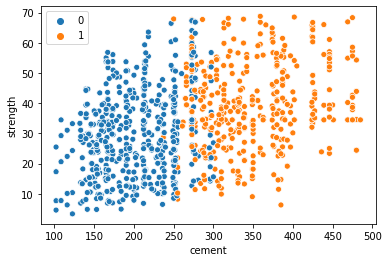

In [34]:
labels=KMeans(n_clusters=2,random_state=100).fit_predict(x)
sns.scatterplot(df['cement'],df['strength'],hue=labels)

In [35]:
#x1=df.copy()
#y1='strength'


def cluster(x,y1,labels):
    columns=list(set(list(x.columns))-set(y1))
    r=int(len(columns)/2)
    f,ax=plt.subplots(r,2,figsize=(15,15))


    a=0
    for col in range(0,r): #this for loop is used for plotting scatter graph for only rows
        for c in range(0,2): # for columns
            if a!=len(columns):
                ax[col][c].scatter(x[y1],x[columns[a]],c=labels)
                ax[col][c].set_xlabel(y1)
                ax[col][c].set_ylabel(columns[a])
                a=a+1
            
        
    

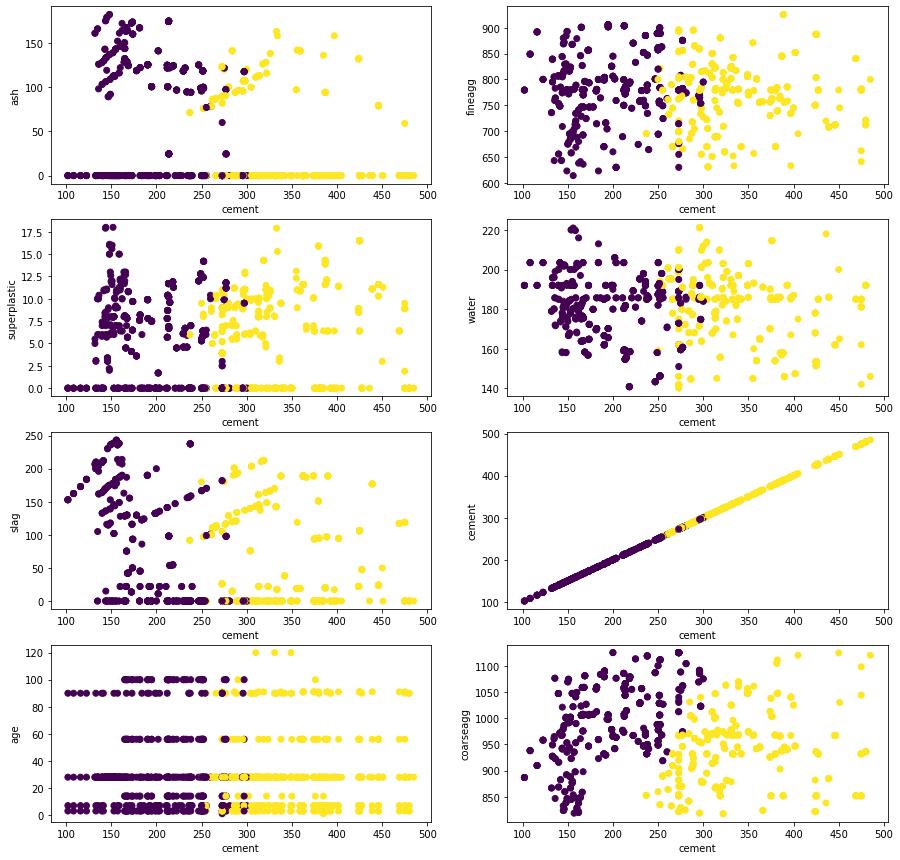

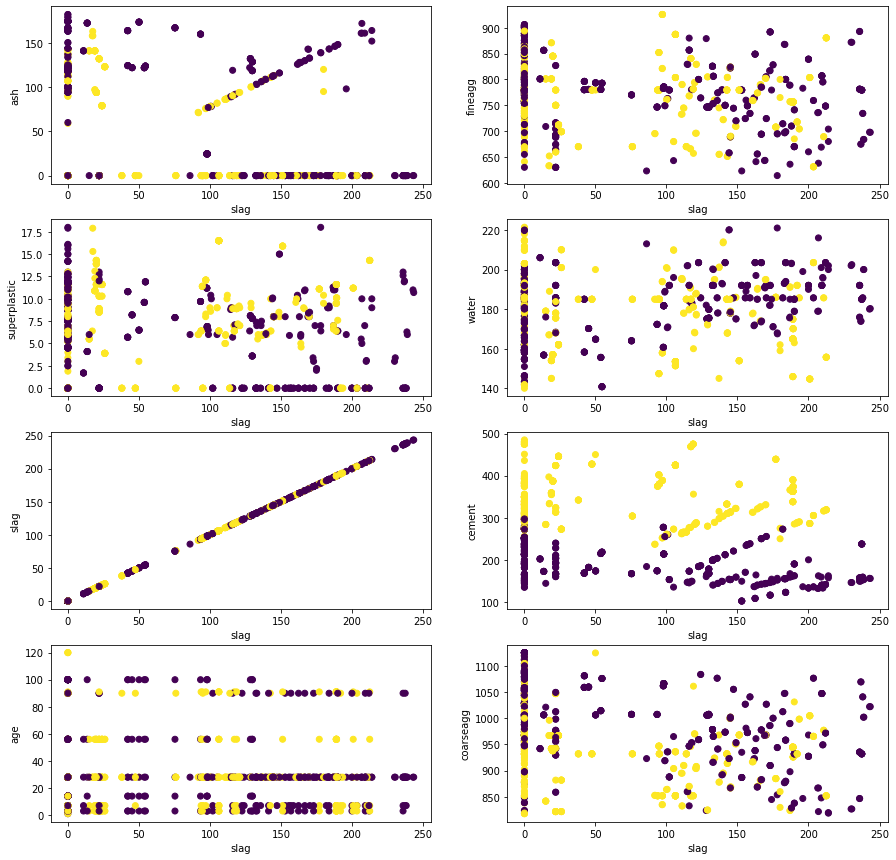

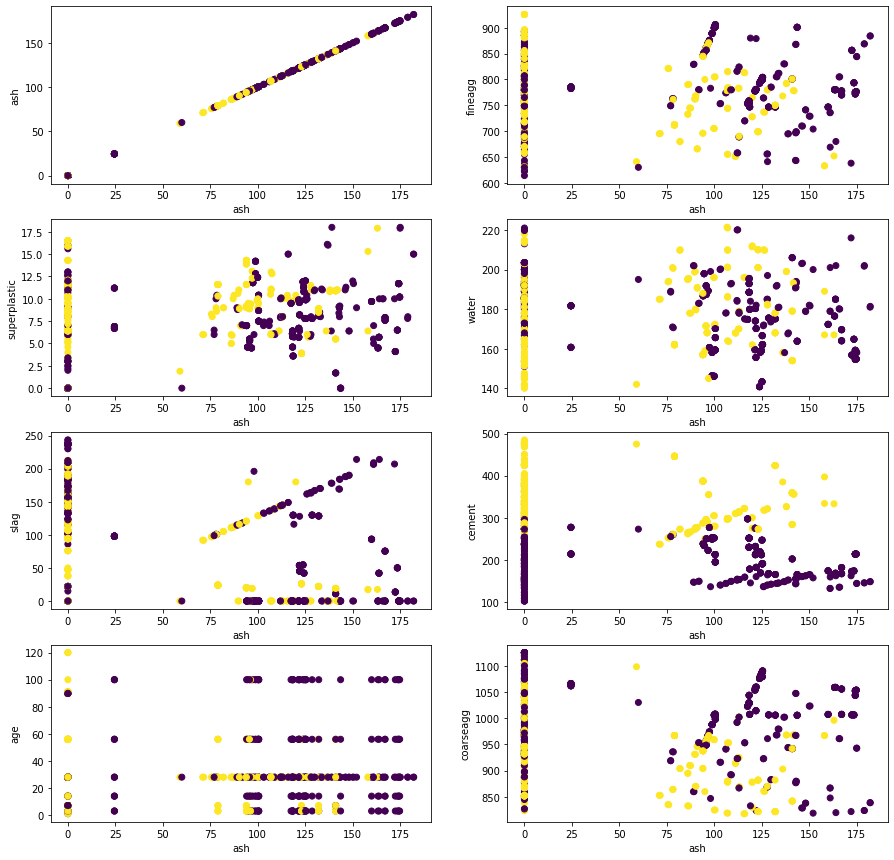

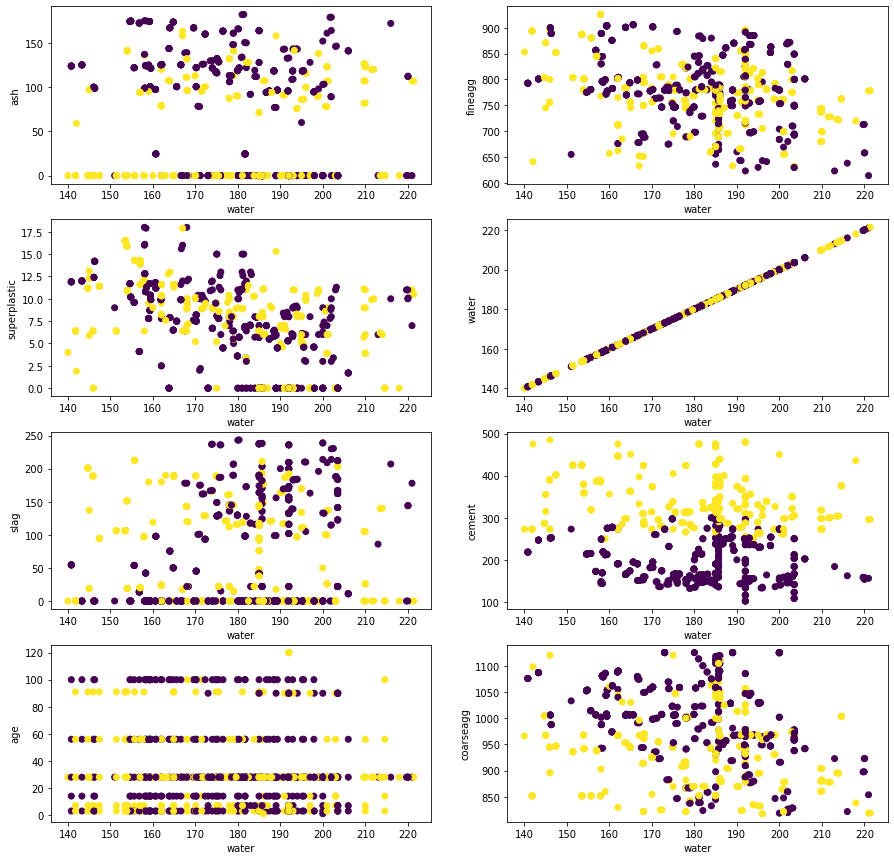

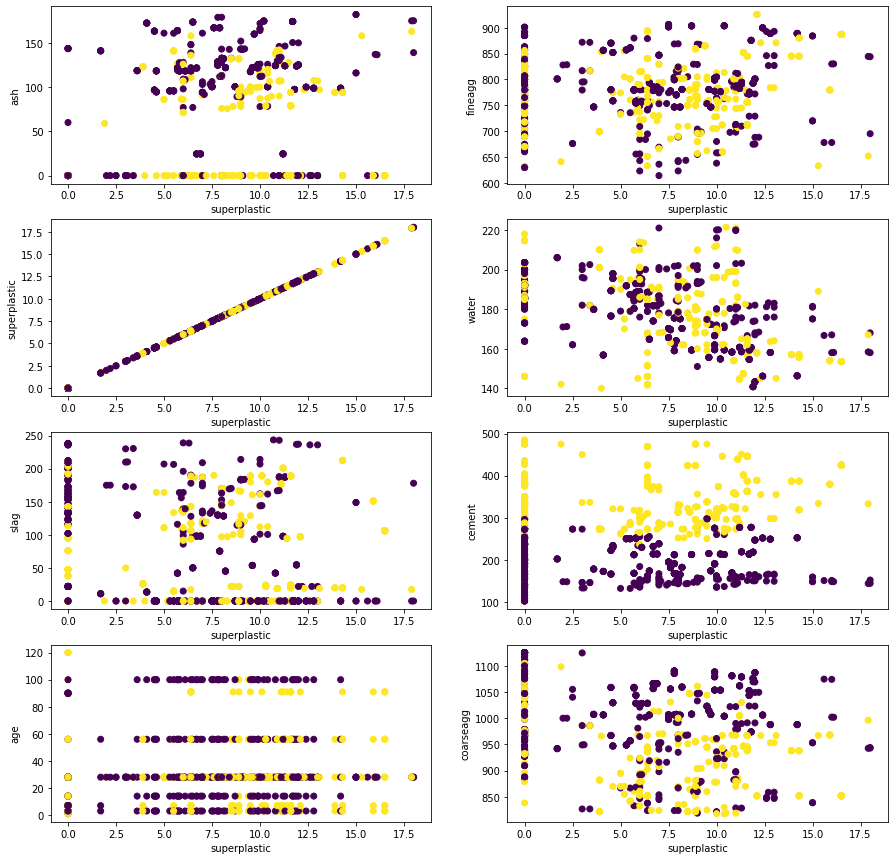

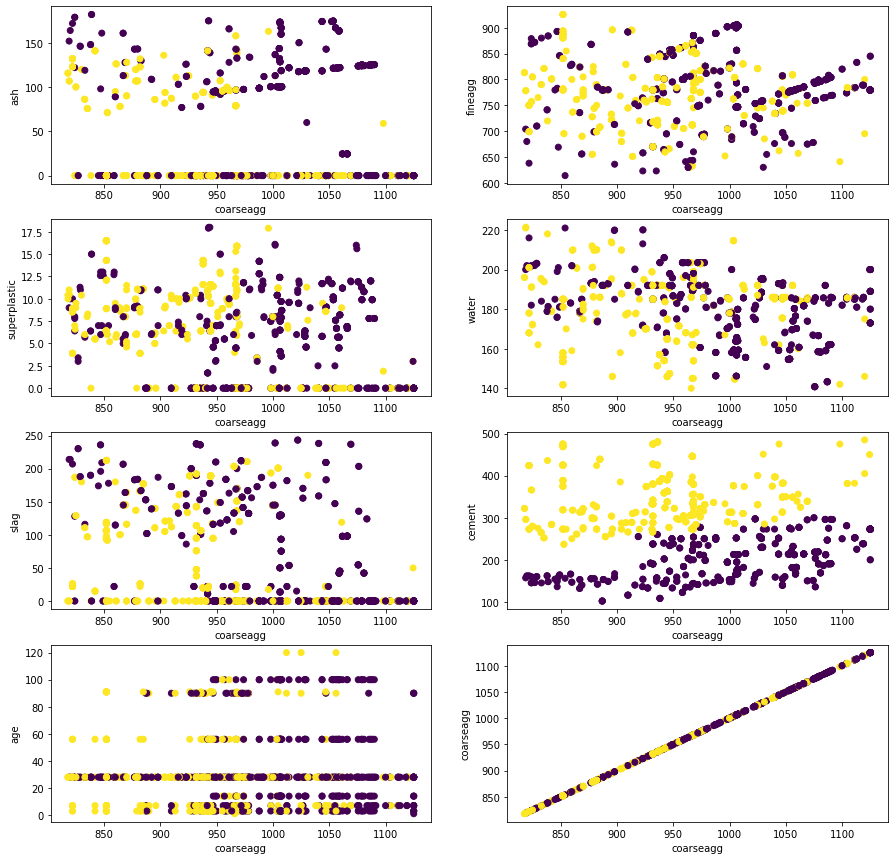

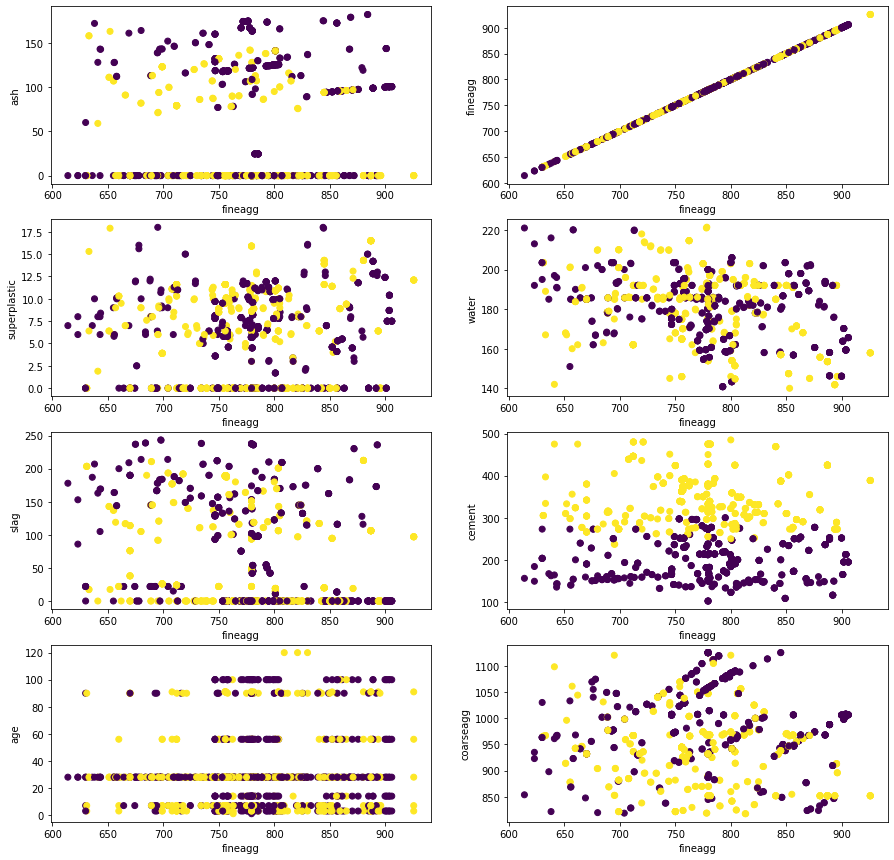

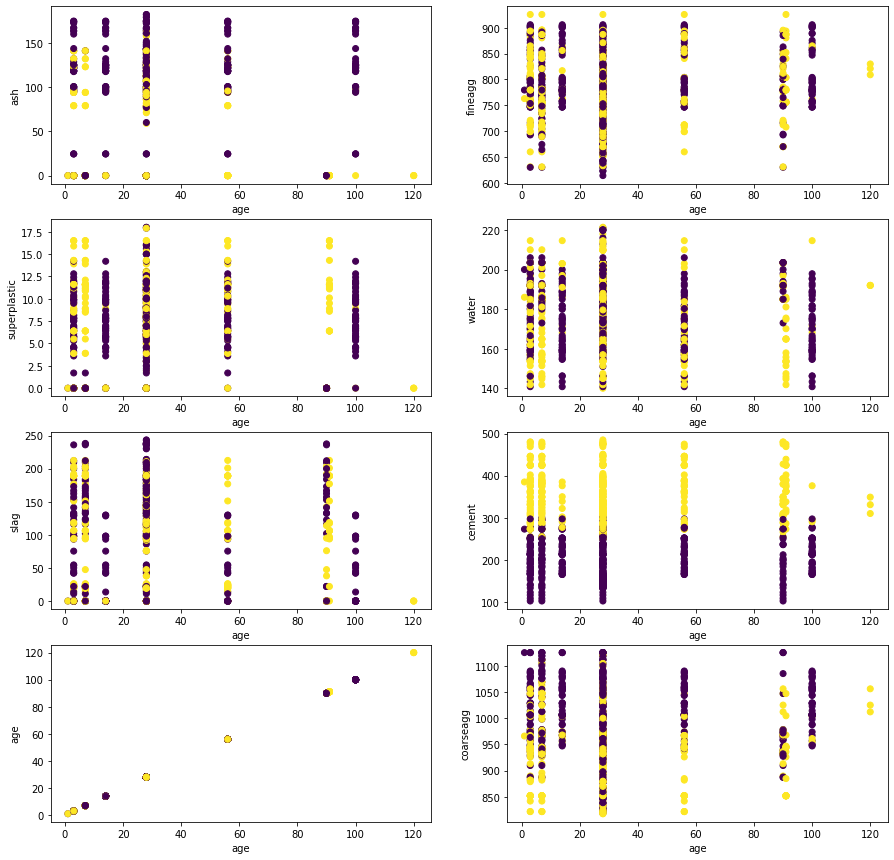

In [36]:
for col in x.columns:
    cluster(x,col,labels)

### Adding Features based on clusters
### Observations from clusters
#### 1.Clusters can be observed between cement and every other independent variables
#### 2.Based on the observation let us add the features called centroids of this cluster

In [37]:
new_df=df.copy()
new_df.head()

new_df=new_df.join(pd.DataFrame(labels,columns=['Labels']))
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  Labels  
0     29.89       0  
1     23.51       0  
2     29.22       0  
3     45.85       1  
4     18.29       0

### Calculating Centroids( mean & Medians) for both the clusters

In [38]:
cement_features=new_df.groupby('Labels')['cement'].agg(['mean','median'])
cement_features

mean  median
Labels                    
0       201.601083   200.0
1       349.257353   339.0

### Merging cement features with new_df

In [39]:
new_df=new_df.merge(cement_features,on='Labels',how='left')
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  Labels        mean  median  
0     29.89       0  201.601083   200.0  
1     23.51       0  201.601083   200.0  
2     29.22       0  201.601083   200.0  
3     45.85       1  349.257353   339.0  
4     18.29       0  201.601083   200.0

In [40]:
new_df.drop('Labels',axis=1)

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3      266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   
...      ...    ...    ...    ...           ...        ...      ...   ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0  28.0   
1026   272.9    0.0    0.0  141.8           6.4      852.1    893.7   3.0   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3  28.0   
1028   342.0   38.0    0.0  185.0           0.0      932.0    670.0  28.0   
1029   272.9    0.0    0.0  173.0           0.0     1125.0    779.5   7.0   

      strength        mean  median  
0        29.89  201.601083   200.0  
1        23.51  201.601083   200.0  
2        29.22  201.601083   200.0  
3        45.85  349.257353   339.0  
4        18.29  201.601083   200.0  
...        ...         ...     ...  
1025     13.29  201.601083   200.0  
1026     41.30  349.257353   339.0  
1027     44.28  349.257353   339.0  
1028     55.06  349.257353   339.0  
1029     52.61  201.601083   200.0  

[1030 rows x 11 columns]

In [41]:
result_df=model_building(df,'strength')
result_cluster=model_building(new_df,'strength')
print('===========Result Before Cluster===========')
print(result_df)
print('\n\n\n===========Result After Cluster============')
print(result_cluster)

===========Result Before Cluster===========
          Model_Name  R Square       RMSE
0  Linear Regression  0.529079  10.316596
1   Lasso Regression  0.529903  10.307571
2   Ridge Regression  0.529079  10.316593
3      Decision Tree  0.686899   8.412107
4      Random Forest  0.791419   6.865945
5          Ada Boost  0.664719   8.704959
6            G Boost  0.783692   6.991961
7                KNN  0.508138  10.543479
8                SVM  0.114086  14.150058



===========Result After Cluster============
          Model_Name  R Square       RMSE
0  Linear Regression  0.528453  10.323447
1   Lasso Regression  0.529343  10.313709
2   Ridge Regression  0.528454  10.323444
3      Decision Tree  0.714950   8.026436
4      Random Forest  0.784948   6.971628
5          Ada Boost  0.664030   8.713906
6            G Boost  0.784938   6.971789
7                KNN  0.507821  10.546876
8                SVM  0.119713  14.105050


###  It is observed that after performing clusters only ada boost and gboost has improved, by considering this we will still prefer to still go ahead with old/ original dataframe(df)

In [42]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

### Features Importance

In [43]:
x_train,x_test,y_train,y_test=traintestsplit(df,'strength',test_size=0.3)
xgb=XGBRegressor()

In [44]:
xgb.fit(x_train,y_train)

[17:11:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

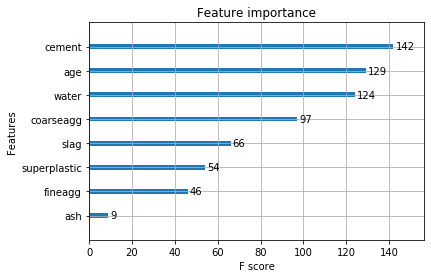

In [45]:
xgboost.plot_importance(xgb)

### Feature Selection

In [46]:
xgb_pred=xgb.predict(x_test)
xgb_r2score=r2_score(y_test,xgb_pred)
xbg_rmse=np.sqrt(mean_squared_error(y_test,xgb_pred))
print('r2 score',xgb_r2score)
print('RMSE',xbg_rmse)

r2 score 0.7883520419786997
RMSE 6.916231430297671


In [47]:
score=[]
threshold=sort(xgb.feature_importances_)

for thres in threshold:
    selection=SelectFromModel(xgb,threshold=thres,prefit=True)
    select_xtrain=selection.transform(x_train) #Automatically it will transform the important features from the trained data
    select_model=XGBRegressor()
    select_model.fit(select_xtrain,y_train)
    select_xtest=selection.transform(x_test)
    new_pred=select_model.predict(select_xtest)
    result=[thres,select_xtrain.shape[1],np.sqrt(mean_squared_error(y_test,new_pred)),r2_score(y_test,new_pred)]
    score.append(result)
score_df=pd.DataFrame(score,columns=['Threshold','No. Of Features','RMSE','R2 Score'])
score_df

# we will start checking from bottom
#depending on the r score value we will decide which feature we need to keep
#when we are adding features the r square should keep on increasing, once it drops we will stop there itself---after 6th r score is decresing. So the threshold will be here of 6th variable
#7 and 8th variable we can drop



[17:11:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNI

Threshold  No. Of Features       RMSE  R2 Score
0   0.041695                8   6.916231  0.788352
1   0.068776                7   7.071054  0.778770
2   0.072136                6   7.046164  0.780325
3   0.074461                5   7.134105  0.774807
4   0.119172                4   7.132982  0.774878
5   0.123618                3   8.642761  0.669493
6   0.194181                2   9.042326  0.638228
7   0.305961                1  12.281066  0.332660

### Dropping Slag And Fineagg

In [48]:
x=df.drop(['slag','fineagg','strength'],axis=1)
y=df[['strength']]

### Performing CrossValidation

In [49]:
# A User defined funciton to perform K fold cross validation on multiple ML Algorithms at once

def kfold(x,y,folds=5):
    lr=LinearRegression()
    ls=Lasso()
    rd=Ridge()
    dt=DecisionTreeRegressor()
    rdf=RandomForestRegressor()
    ada=AdaBoostRegressor()
    gboost=GradientBoostingRegressor()
    xgb=XGBRegressor()
    svm=SVR()
    knn=KNeighborsRegressor()
    
    score_lr=cross_val_score(lr,x,y,cv=folds)
    score_ls=cross_val_score(ls,x,y,cv=folds)
    score_rd=cross_val_score(rd,x,y,cv=folds)
    score_dt=cross_val_score(dt,x,y,cv=folds)
    score_rdf=cross_val_score(rdf,x,y,cv=folds)
    score_ada=cross_val_score(ada,x,y,cv=folds)
    score_gboost=cross_val_score(gboost,x,y,cv=folds)
    score_xgboost=cross_val_score(xgb,x,y,cv=folds)
    score_svm=cross_val_score(svm,x,y,cv=folds)
    score_knn=cross_val_score(knn,x,y,cv=folds)
    
    
    models=[lr,ls,rdf,dt,rdf,ada,gboost,xgb,svm,knn]
    model_names=['Linear Regression','Lasso Regression','Ridge Regression','Decison Tree','Random Forest','Ada Boost Regression','G Boost Regression','XG Boost','SVM','KNN']
    scores=[score_lr,score_ls,score_rd,score_dt,score_rdf,score_ada,score_gboost,score_xgboost,score_svm,score_knn]
    
    result=[]
    for x in range(0,len(models)):
        print(model_names[x])
        se_mean=np.mean(scores[x])
        se_std=np.std(scores[x])
        m_name=model_names[x]
        var=[m_name,se_mean,se_std]
        result.append(var)
    
    
    result_df=pd.DataFrame(result,columns=['Model Name','Average Accuracy','Std Deviation'])
    return result_df

In [50]:
kfold(x,y)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

[17:11:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Linear Regression
Lasso Regression
Ridge Regression
Decison Tree
Random Forest
Ada Boost Regression
G Boost Regression
XG Boost
SVM
KNN


C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Name  Average Accuracy  Std Deviation
0     Linear Regression          0.466549       0.077726
1      Lasso Regression          0.466262       0.077464
2      Ridge Regression          0.466549       0.077726
3          Decison Tree          0.636066       0.050468
4         Random Forest          0.773403       0.021434
5  Ada Boost Regression          0.587050       0.037903
6    G Boost Regression          0.728678       0.034065
7              XG Boost          0.727089       0.035546
8                   SVM          0.157491       0.026667
9                   KNN          0.554274       0.035017

### Hyper parameter Tuning

> Chosing 3 Top performing ML algorthms 
 1. Linear Regression
 2. Ada Boost
 3. G Boost

#### Linear Regression

In [51]:
lr=LinearRegression()
params={'fit_intercept':[True,False],'normalize':[True,False]}


In [52]:
lr_grid=GridSearchCV(lr,params,scoring='r2')

In [53]:
lr_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [54]:
lr1=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False)

In [55]:
lr1.fit(x_train,y_train)
lr1_pred=lr1.predict(x_test)
r2_score(y_test,lr1_pred)

0.5290792207520708

In [56]:
lr_random=RandomizedSearchCV(lr,params,scoring='r2')

In [57]:
lr_random.fit(x_train,y_train)


C:\Users\ussan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=0)

In [58]:
lr2=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False)

In [59]:
lr2.fit(x_train,y_train)
lr2_pred=lr2.predict(x_test)
r2_score(y_test,lr2_pred)

0.5290792207520708

### Performing Hyper Parameter Tuning for cross validation

> Using Grid Search CV and Random Search Cv

In [60]:
def hyperparamtuning(grid_or_random,estimator,param,X=x_train,Y=y_train):
    if grid_or_random=='grid':
        perform_obj=GridSearchCV(estimator,param,scoring='r2')
    elif grid_or_random=='random':
        perform_obj=RandomizedSearchCV(estimator,param,scoring='r2')
    
    obj_predict=perform_obj.fit(x,y)
    result=obj_predict.best_estimator_
    return result

In [61]:
# Ada Boost
ada=AdaBoostRegressor()
ada_param={'n_estimators':[200,300,400,500],'learning_rate':[0.001,0.01,0.05,0.5,1]}

In [62]:
ada_grid=hyperparamtuning('grid',ada,ada_param)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [63]:
ada_grid

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
                  n_estimators=400, random_state=None)

In [64]:
score_ada_grid=cross_val_score(ada_grid,x,y,cv=10)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [65]:
score_ada_grid.mean()

0.5910418657451995

In [66]:
ada_random=hyperparamtuning('random',ada,ada_param)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [67]:
ada_random

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
                  n_estimators=200, random_state=None)

In [68]:
score_ada_random=cross_val_score(ada_random,x,y,cv=10)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [69]:
score_ada_random.mean()

0.5923514036489338

### G Boost

In [70]:
# G Boost
gb=GradientBoostingRegressor()
gb_param={'n_estimators':[600,650,700,750],'learning_rate':[0.001,0.015,0.005,0.05,1]}

In [71]:
gb_grid=hyperparamtuning('grid',gb,gb_param)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [72]:
score_gb_grid=cross_val_score(gb_grid,x,y,cv=10)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [73]:
score_gb_grid.mean()

0.7809391624627896

In [74]:
gb_random=hyperparamtuning('random',gb,gb_param)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [75]:
score_gb_random=cross_val_score(gb_random,x,y,cv=10)

C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ussan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [76]:
score_gb_random.mean()

0.7804458773921656